In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data - (1. dataset)

In [2]:
# load Ground Truth
df1 = pd.read_csv('D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv')
df1.rename(columns={"updrs108": "updrs"}, inplace=True)
df1.drop('nqScore', axis=1, inplace=True)
df1.head()

,pID,gt,updrs,afTap,sTap,typingSpeed,file_1,file_2
0,11,True,14.25,NaN,162.25,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
1,60,False,2.00,NaN,162.25,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
2,67,True,25.25,NaN,133.75,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
3,68,False,6.00,NaN,159.00,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
4,70,True,26.25,NaN,113.50,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


In [3]:
df1.shape

(31, 8)

In [29]:
print('Patients with PD: ', len(df1[df1['gt']==False]))
print('Patients without PD: ', len(df1[df1['gt']==True]))

Patients with PD:  13
Patients without PD:  18


In [3]:
# load Ground Truth
df2 = pd.read_csv('D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv')
df2.rename(columns={"updrs108": "updrs"}, inplace=True)
df2.drop('nqScore', axis=1, inplace=True)
df2.head()

,pID,gt,updrs,afTap,sTap,typingSpeed,file_1
0,1000,True,27,79.0,184.5,56.866667,1424946827.1000_001_014.csv
1,1001,True,16,96.5,189.0,118.000000,1427279751.1001_001_014.csv
2,1002,False,5,140.0,158.0,119.037037,1426676689.1002_001_014.csv
3,1004,True,22,83.5,191.5,74.266667,1429866367.1004_001_014.csv
4,1005,True,17,68.0,150.0,74.969697,1430134526.1005_001_014.csv


In [30]:
print('Patients with PD: ', len(df2[df2['gt']==False]))
print('Patients without PD: ', len(df2[df2['gt']==True]))

Patients with PD:  30
Patients without PD:  24


In [4]:
df_conc = pd.concat([df1, df2], ignore_index=True)
df_conc.tail()

,pID,gt,updrs,afTap,sTap,typingSpeed,file_1,file_2
80,1063,False,0.0,110.0,170.0,109.800000,1463511198.1063_001_014.csv,NaN
81,1064,True,28.0,75.5,140.0,105.333333,1458723488.1064_001_014.csv,NaN
82,1066,True,12.0,118.0,170.5,140.250000,1460104760.1066_001_014.csv,NaN
83,1068,True,26.0,65.5,98.0,48.800000,1460559248.1068_001_014.csv,NaN
84,1070,False,2.0,126.0,154.5,54.933333,1463130212.1070_001_014.csv,NaN


Text(0.5, 0, 'Parkinson disease')

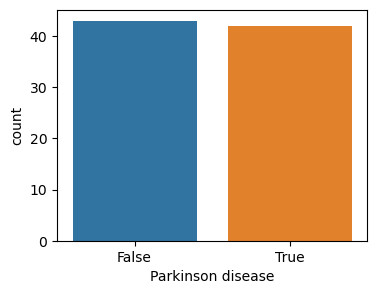

In [5]:
plt.figure(figsize=[4,3])
sns.countplot(x = 'gt', data = df_conc)
plt.xlabel('Parkinson disease')

In [6]:
# read example file
df_ID = pd.read_csv('D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS2PD/data_MIT-CS2PD/'+ df2['file_1'][1], header = None, names=['pressedKey','holdTime', 'releaseTime', 'pressTime'])
df_ID.head()

,pressedKey,holdTime,releaseTime,pressTime
0,2,0.1135,1.4512,1.3377
1,parenright,0.1269,2.3214,2.1945
2,Shift_L,0.2064,2.3555,2.1491
3,space,0.1317,3.2163,3.0847
4,mouse_left,0.1001,6.7385,6.6384


In [7]:
df_ID['flightTime'] = df_ID['pressTime'] - \
    pd.concat([pd.Series(0), df_ID['releaseTime']], ignore_index=True)
df_ID.head()

,pressedKey,holdTime,releaseTime,pressTime,flightTime
0,2,0.1135,1.4512,1.3377,1.3377
1,parenright,0.1269,2.3214,2.1945,0.7433
2,Shift_L,0.2064,2.3555,2.1491,-0.1723
3,space,0.1317,3.2163,3.0847,0.7292
4,mouse_left,0.1001,6.7385,6.6384,3.4221


In [8]:
df_ID['latencyTime']=df_ID['flightTime']+pd.concat([pd.Series(0),df_ID['holdTime']],ignore_index=True)
df_ID.tail()

,pressedKey,holdTime,releaseTime,pressTime,flightTime,latencyTime
1744,Shift_L,0.3029,771.9147,771.6118,-0.2687,-0.1766
1745,Return,0.0978,774.1936,774.0958,2.1811,2.4840
1746,minus,0.0979,774.5318,774.4340,0.2404,0.3382
1747,space,0.1241,775.0568,774.9327,0.4009,0.4988
1748,Shift_L,0.6236,778.9472,778.3236,3.2668,3.3909


### Feature extraction - 1. approach  (1. dataset)

In [55]:
# first filtration, later outliers

# to będzie potem w zapętleniu x razy, x - liczba blokow Bi
df_newtemp = df_ID[df_ID['releaseTime'] < 360]
Q1 = df_newtemp['holdTime'].quantile(q=0.25)
Q3 = df_newtemp['holdTime'].quantile(q=0.75)
IQR = Q3 - Q1
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
vout = len(df_newtemp[(df_newtemp['holdTime'] < lower_lim)
           | (df_newtemp['holdTime'] > upper_lim)])
viqr = (df_newtemp['holdTime'].quantile(q=0.5 - Q1))/(Q3 - Q1)

In [28]:
# import nqDataLoader as nq
# pressedKey, holdTime, pressTime, releaseTime= nq.getDataFiltHelper('MIT-CS2PD/data_MIT-CS2PD/' + df2.loc[1]['file_1'])

## Read data - (2. dataset TAPPY)

In [ ]:
directory_path1 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Archived users/'
files_list1 = os.listdir(directory_path1)
data1 = pd.read_table(
    directory_path1 + files_list1[11], sep=': ', names=['Value'], engine='python')
data1

In [44]:
users = [el.split("_")[1].split(".")[0] for el in files_list1]
df_ID2 = pd.DataFrame(data=users, columns=['pID'])

directory_path2 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Tappy Data/'
files_list2 = os.listdir(directory_path2)

for i, el in enumerate(df_ID2['pID']):
    print(el)
    # temp = pd.read_table(
    #     directory_path1 + files_list1[i], sep=': ', names=['Value'], engine='python', on_bad_lines='skip', keep_default_na=False, na_values=[''])
    temp = pd.read_csv(directory_path1 + files_list1[i], sep=': ',header=None, engine='python',keep_default_na=False)
    if i == 11:
        print(temp)
    # read_info = temp.loc['Parkinsons', 'Value']
    # print(read_info)

    # # df_ID2.loc[[i], 'Parkinsons'] = read_info

    # temp = [x for x in files_list2 if x.startswith(el)]
    # df_ID2.loc[[i], 'files'] = pd.Series([temp], index=df_ID2.index[[i]])


df_ID2

0EA27ICBLF
0QAZFRHQHW
0WTDIGPSBZ
1HOEBIGASW
1WMVCCU4RH
1XNJCXS3EY
2JTCBKUP8T
2X17VCRRQA
310NXPGJPD
39KQRZCESF
3DIXPRIOSW
3LBXTMXULC
            0
0  BirthYear:
3MZWDTW7CC
48DZPAJ5NS
4GUYFBZMK9
4XPHKKBXS6
5ARV4LHEJ0
5CECBJXGB3
5PQVTWULAC
5USOYSDCXB
5YFAPLRCMD
6LB9FQABZQ
6R9IGYWVWT
6WBXSDG5BB
6YXFEMHYZI
7HTEQAAWWO
7QVQD5IJEH
7XS9VOLXWU
81NEUZEBXI
8EY6NZAKCI
8MERXVINPN
8O9IAIA9L1
8TEUUGQBYB
927ZLCPEJM
95S93AXF86
9GBSZXI2BB
9JRHCGCWAZ
9RCEHVGNCJ
9TUXDIR9EE
9ZRBC5WOZR
ACSKCOJC06
AFNOZ1KI1M
AFQWSP8ARK
AJHHNPKG0K
AJIGSB2YPW
ARUGT4UL2R
ASP8RSNO73
AVNGRDUXE5
AXXXXBBCCH
B4NL4SV9ZC
BBCWCBNBPR
BENXJNDSC4
BFXNVL50DC
BIGWMXFU3B
BZ8MQ2TBMS
C6UGS6P0J0
CAXCJIKLYM
CEU6KM05RU
COK8G1W7JY
CPSM4LIXDS
CYC6IZJYTE
E0TBSMYHQI
E0XRQVF05S
E1E2I8HUGC
E7UA8EHENF
EBGLZDVO5S
EF9XEFXPBN
EKG57AN0N6
EMYGMAIB2L
ERFIZ5O8FM
EX8J9DGRSY
EZF9NAHLOU
F56FSV2EP7
F8KU8UP2SZ
FFNMFHHSZJ
FHEOPKL3QQ
FIWPKLWCT5
FX9KOOZRZL
FXC5YFXZ0K
G6OE5CXQPY
GEYWAGTINR
GHRLW1IJRV
GMCJGJHMZN
GN1CUIPUTJ
GN3N4ZNCV9
GOCJ4TNPII
GRPUBQLE4F
GUDRVXO6RX
H08A

,pID
0,0EA27ICBLF
1,0QAZFRHQHW
2,0WTDIGPSBZ
3,1HOEBIGASW
4,1WMVCCU4RH
...,...
222,ZT9ASWFCFS
223,ZWBPPNQCUX
224,ZWHGXDUDLG
225,ZY9CCHSPF2


In [11]:
looking_str = files_list1[1].split("_")[1].split(".")[0]
looking_str

directory_path2 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Tappy Data/'
files_list2 = os.listdir(directory_path2)
results = [x for x in files_list2 if x.startswith(looking_str)]
results

['0QAZFRHQHW_1609.txt', '0QAZFRHQHW_1610.txt']

In [12]:
data2 = pd.read_table(directory_path2 + results[0], index_col=False, names=[
                      'User', 'Date', 'Timestamp', 'Hand', 'holdTime', 'Direction', 'flightTime', 'latencyTime', ])
data2.drop(columns=['User'], inplace=True)
data2

,Date,Timestamp,Hand,holdTime,Direction,flightTime,latencyTime
0,160916,19:20:43.891,L,78.1,LL,312.5,257.8
1,160916,19:20:44.344,L,78.1,LL,453.1,375.0
2,160916,19:20:44.742,L,62.5,LL,414.1,335.9
3,160916,19:20:45.516,L,93.8,LL,742.2,679.7
4,160916,19:20:46.047,R,101.6,LR,523.4,429.7
...,...,...,...,...,...,...,...
819,160930,09:32:11.242,R,78.1,RR,234.4,109.4
820,160930,09:32:13.555,R,156.3,LR,558.6,484.4
821,160930,14:09:36.102,L,78.1,LL,476.6,359.4
822,160930,21:51:49.695,L,93.8,LL,453.1,351.6


In [15]:
grouped_data = data2.groupby('Date').agg(list)
grouped_data['Length'] = grouped_data['Timestamp'].apply(len) 
grouped_data

,Timestamp,Hand,holdTime,Direction,flightTime,latencyTime,Length
Date,,,,,,,
160916,"[19:20:43.891, 19:20:44.344, 19:20:44.742, 19:...","[L, L, L, L, R, R]","[78.1, 78.1, 62.5, 93.8, 101.6, 93.8]","[LL, LL, LL, LL, LR, RR]","[312.5, 453.1, 414.1, 742.2, 523.4, 203.1]","[257.8, 375.0, 335.9, 679.7, 429.7, 101.6]",6
160918,"[10:35:01.508, 10:35:01.930, 10:35:02.164, 10:...","[L, R, R, L, R, R, R, R, L, L, L, R, R, L, R, ...","[109.4, 214.8, 66.4, 93.8, 187.5, 109.4, 156.3...","[RL, LR, RR, RL, RR, RR, LR, RR, LL, LL, LL, L...","[289.1, 316.4, 382.8, 562.5, 453.1, 265.6, 515...","[175.8, 207.0, 168.0, 390.6, 281.3, 78.1, 437....",80
160919,"[18:39:21.977, 18:39:22.477, 18:39:22.922, 21:...","[L, L, L, R, L, L, R, L, R, L, R, L, L, R]","[78.1, 70.3, 78.1, 171.9, 132.8, 140.6, 132.8,...","[LL, LL, LL, RR, RL, LL, LR, RL, LR, RL, LR, R...","[421.9, 507.8, 437.5, 406.3, 304.7, 695.3, 476...","[343.8, 429.7, 367.2, 289.1, 195.3, 562.5, 335...",14
160921,"[16:34:25.703, 16:34:27.164, 16:45:29.914, 16:...","[L, L, L, L, R, L, L, L]","[93.8, 109.4, 125.0, 140.6, 121.1, 101.6, 117....","[LL, LL, RL, LL, LR, RL, LL, LL]","[453.1, 511.7, 335.9, 355.5, 496.1, 796.9, 464...","[343.8, 418.0, 226.6, 214.8, 355.5, 675.8, 363...",8
160922,"[08:40:36.512, 08:40:37.027, 08:40:37.402, 08:...","[L, L, L, R, L, L, L, R, R, R, L, L, L, R, R, ...","[78.1, 78.1, 62.5, 105.5, 93.8, 97.7, 101.6, 1...","[LL, LL, LL, RR, SL, LL, LL, LR, RR, SR, RL, L...","[359.4, 515.6, 390.6, 203.1, 382.8, 214.8, 203...","[281.3, 437.5, 312.5, 125.0, 234.4, 121.1, 109...",559
160923,"[15:54:36.141, 15:54:36.688, 15:54:36.938, 15:...","[L, L, L, L, R, R, L, R, L, S, R, R, L, R, L, ...","[93.8, 93.8, 93.8, 109.4, 93.8, 78.1, 31.3, 10...","[LL, LL, LL, LL, LR, RR, RL, SR, RL, LS, RR, R...","[187.5, 546.9, 250.0, 781.3, 546.9, 187.5, 484...","[93.8, 453.1, 156.3, 687.5, 437.5, 93.8, 414.1...",51
160925,"[09:04:27.662, 09:04:29.318]","[L, L]","[121.1, 146.5]","[LL, LL]","[404.3, 634.8]","[347.7, 507.8]",2
160926,"[14:19:25.395, 14:19:26.031, 14:19:26.680, 14:...","[L, R, L, R, L, L, L, R, R, L, L, R, R]","[105.5, 152.3, 82.0, 136.7, 148.4, 179.7, 164....","[RL, LR, RL, LR, LL, LL, LL, LR, RR, LL, LL, L...","[546.9, 589.8, 718.8, 710.9, 355.5, 722.7, 406...","[414.1, 484.4, 566.4, 628.9, 187.5, 574.2, 226...",13
160927,"[13:47:29.781, 13:47:31.344, 19:24:13.188, 19:...","[L, L, L, R, R, R, L, R, R, R, L, R, R, L, R, ...","[93.8, 156.3, 164.1, 117.2, 132.8, 132.8, 140....","[LL, LL, RL, LR, RR, RR, RL, LR, RR, LR, RL, L...","[441.4, 441.4, 218.8, 437.5, 703.1, 234.4, 539...","[328.1, 328.1, 109.4, 273.4, 585.9, 101.6, 406...",30


In [25]:
idx=grouped_data['Length'].idxmax()
new_rec=data2[data2['Date']==idx]
print(new_rec)

       Date     Timestamp Hand  holdTime Direction  flightTime  latencyTime
108  160922  08:40:36.512    L      78.1        LL       359.4        281.3
109  160922  08:40:37.027    L      78.1        LL       515.6        437.5
110  160922  08:40:37.402    L      62.5        LL       390.6        312.5
111  160922  08:40:57.775    R     105.5        RR       203.1        125.0
112  160922  14:15:30.012    L      93.8        SL       382.8        234.4
..      ...           ...  ...       ...       ...         ...          ...
662  160922  22:36:15.094    R     109.4        LR       218.8         62.5
663  160922  22:36:16.766    R      78.1        RR       187.5        125.0
664  160922  22:36:19.953    L     140.6        RL       609.4        515.6
665  160922  22:36:20.312    R      93.8        LR       406.3        265.6
666  160922  22:36:20.820    R      78.1        RR       523.4        429.7

[559 rows x 7 columns]
